In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
from sklearn.decomposition import PCA

In [3]:
import pickle

loading the pickle data

In [4]:
data=pickle.load(open('D:/BISM/mlops/cropped_images_data/data_img_100_100.pickle',mode='rb'))

In [5]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,Gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,male
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,male
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,male
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,male
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,male


now lets find the Eigen face

In [6]:
#mean face:
x=data.drop('Gender' , axis=1).values

In [7]:
x.shape

(4550, 10000)

In [8]:
mean_face=np.mean(x, axis=0)

In [9]:
mean_face.shape

(10000,)

In [10]:
first_face=mean_face.reshape(100,100)

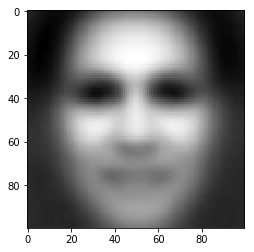

In [11]:
plt.imshow(first_face,cmap='gray')

In [12]:
x_t=x-mean_face

In [13]:
first_face=x_t[0]

In [14]:
first_face.shape

(10000,)

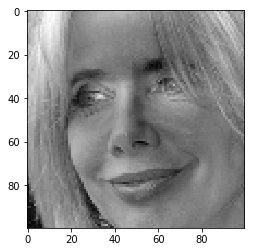

In [15]:
plt.imshow(first_face.reshape(100,100),cmap='gray')

we now need to pass our transformed data to PCA to get the eigenimage 

In [16]:
pca=PCA(n_components=None ,whiten=True , svd_solver='auto')
pca.fit(x_t)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [17]:
exp_var_df=pd.DataFrame()
exp_var_df['explained_var']=pca.explained_variance_ratio_
exp_var_df['cum_explained_var']=exp_var_df['explained_var'].cumsum()

In [18]:
exp_var_df['principle_component']=np.arange(1,len(exp_var_df)+1)

In [19]:
exp_var_df.head()

,explained_var,cum_explained_var,principle_component
0,0.251543,0.251543,1
1,0.116411,0.367953,2
2,0.102999,0.470952,3
3,0.051777,0.522729,4
4,0.033026,0.555755,5


In [20]:
exp_var_df.set_index('principle_component', inplace=True)

In [21]:
exp_var_df.head()

,explained_var,cum_explained_var
principle_component,,
1,0.251543,0.251543
2,0.116411,0.367953
3,0.102999,0.470952
4,0.051777,0.522729
5,0.033026,0.555755


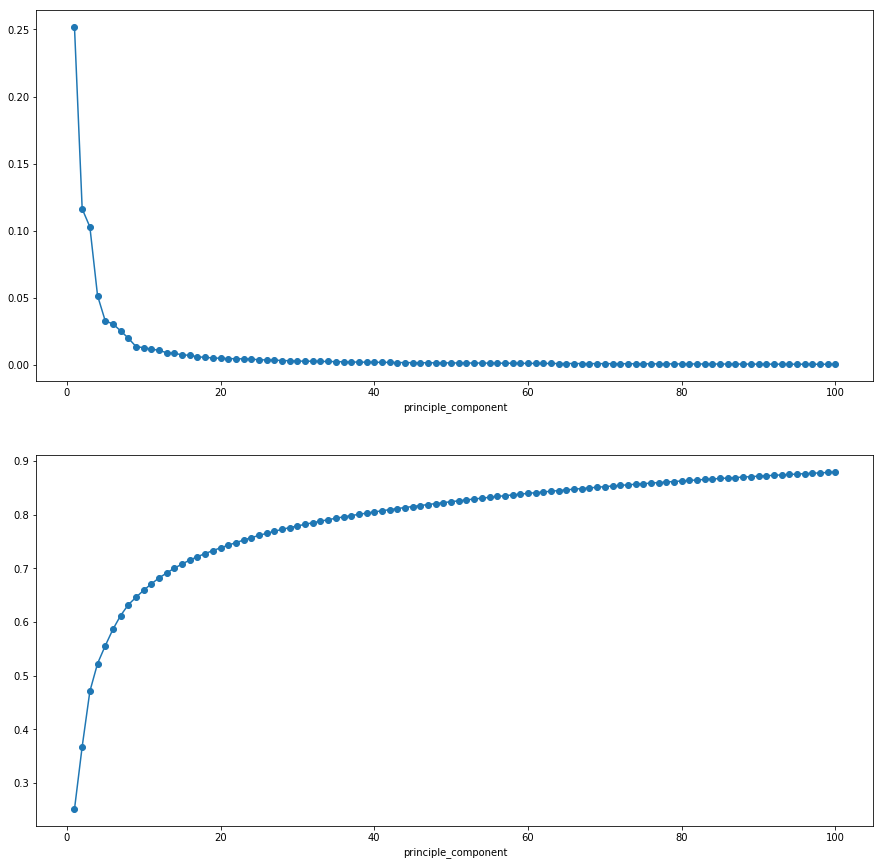

In [22]:
#let us visualize the variance

fig,ax= plt.subplots(nrows=2 , figsize=(15,15))

exp_var_df['explained_var'].head(100).plot(kind='line' , marker='o' , ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line' , marker='o' , ax=ax[1])

In [23]:
pca_50=PCA(n_components=50 , whiten=True , svd_solver='auto')
pcs_data=pca_50.fit_transform(x_t)

In [25]:
pcs_data.shape

(4550, 50)

In [26]:
#saving data 

In [28]:
y=data['Gender'].values

In [30]:
np.save('D://BISM/mlops/cropped_images_data/data_pca_50_target',pcs_data , y)

In [31]:
# saving pca

In [33]:
pca_dict={'pca' : pca_50 , 'mean_face' : mean_face}

In [34]:
pickle.dump(pca_dict , open('D://BISM/mlops/cropped_images_data/pca_dict.pickle' , 'wb'))

visualizing eigenfaces

In [35]:
pca_data_inv=pca_50.inverse_transform(pcs_data)

In [36]:
pca_data_inv.shape

(4550, 10000)

In [41]:
eig_image=pca_data_inv[0,:].reshape(100,100)

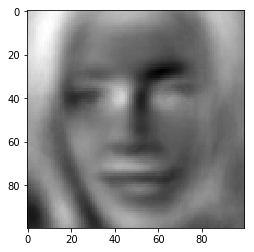

In [43]:
plt.imshow(eig_image , cmap='gray')

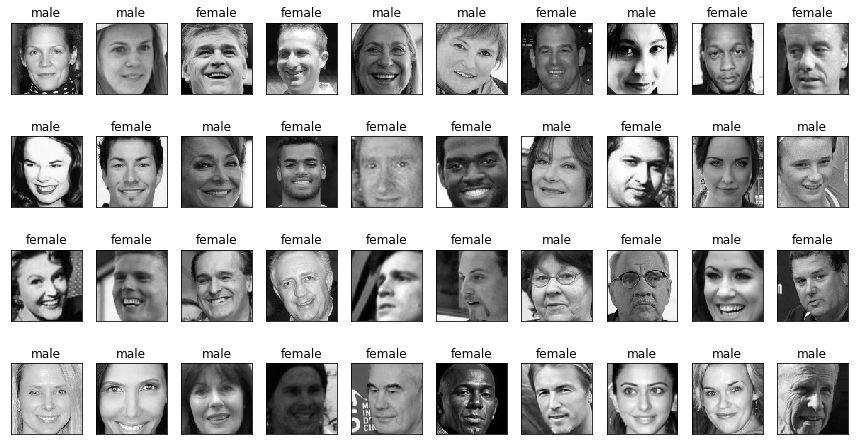

====================Eigen Images====================


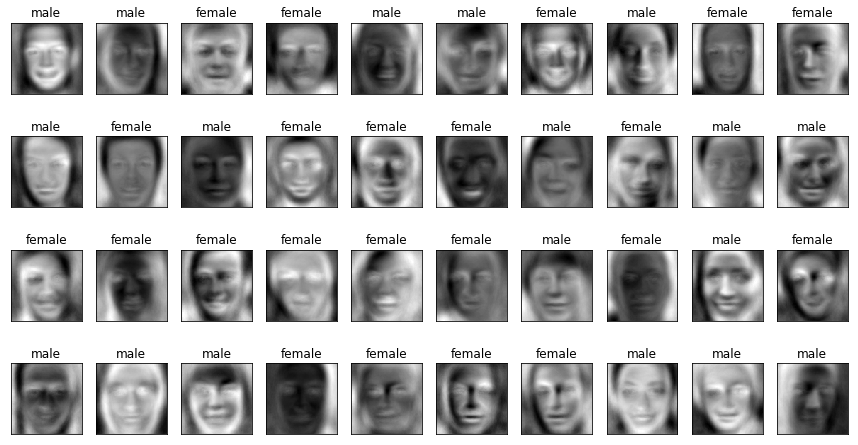

In [47]:
np.random.seed(41)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()